<a href="https://colab.research.google.com/github/soham283/Codersweek-ML/blob/master/mlday3task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 IMPORTING THE REQUIRED LIBRARIES
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils




In [27]:
ds = pd.read_csv('http://iali.in/datasets/mushrooms.csv')
dat = ds.values

print (dat.shape)

headers = list(ds.columns.values) #store features of mushrooms

(8124, 23)


In [0]:
#IGNORE THIS CELL

arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
#q = np.concatenate((arr,b), axis=0)
#print arr

le = pp.LabelEncoder()
le.fit(dat[:, 0])
y = le.transform(dat[:, 0])
le1 = pp.LabelEncoder()
le1.fit(dat[:, 1])
z = le1.transform(dat[:, 1])
le2 = pp.LabelEncoder()
le2.fit(dat[:, 2])
zz = le2.transform(dat[:, 2])

# y = np.vstack(y, z)
# z = np.vstack(z)
# y = np.vstack(y)
qqw = np.vstack((y, z))
qqw = np.vstack((qqw, zz))
#print qqw.T

In [29]:
#Data Preprocessing
l = pp.LabelEncoder()
l.fit(dat[:, 0])
dataa = l.transform(dat[:, 0])

for ix in range(1, dat.shape[1]):
    le = pp.LabelEncoder()
    le.fit(dat[:, ix])
    y = le.transform(dat[:, ix])
    dataa = np.vstack((dataa , y))
    
data = dataa.T

cate = data[:, 0] #One hot encoding for Neural Network implementation

print (data.shape) ##FINALLLYY O YEAH!!!

(8124, 23)


In [30]:
split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [0]:
acc = []
ans = []

for ix in range(10):
    dt = DTC()
    
    start = datetime.datetime.now()
    dt.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = dt.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    tem = dt.feature_importances_
    ans.append(tem)
    #print "\n"

Features most indicative of a poisonous mushroom wrt Decision Tree Model :  spore-print-color


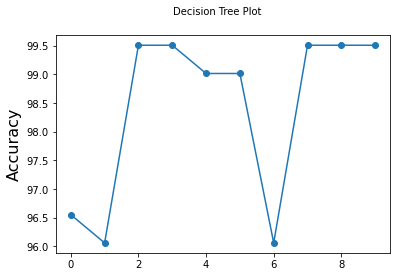

In [32]:
temp = [] 
for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))
    
mode = max(set(temp), key=temp.count) #find mode for features importance in decision trees
print ("Features most indicative of a poisonous mushroom wrt Decision Tree Model : ", headers[mode+1])

plt.figure(0)
plt.suptitle('Decision Tree Plot', fontsize=10)
plt.plot(acc, '-o')
plt.ylabel('Accuracy', fontsize=16)
plt.show()

In [0]:
est = [] #taking variable estimators
acc = []
ans = []
for iy in range(2, 200, 20):
    est.append(iy)

for ix in range(len(est)):
    rf = RFC(n_estimators=est[ix], n_jobs=2)
    #print "No. of Decision Trees : ", est[ix]
    
    start = datetime.datetime.now()
    rf.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = rf.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    tem = rf.feature_importances_
    ans.append(tem)
    #print "\n"

Features most indicative of a poisonous mushroom wrt Random Forest Model :  odor


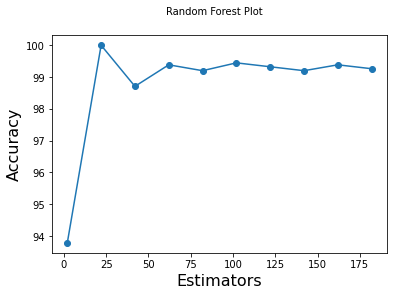

In [34]:
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print ("Features most indicative of a poisonous mushroom wrt Random Forest Model : ", headers[mode+1])

plt.figure(1)
plt.suptitle('Random Forest Plot', fontsize=10)
plt.plot(est, acc, '-o')
plt.xlabel('Estimators', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

In [35]:
lr = LR(n_jobs=-1)

start = datetime.datetime.now()
lr.fit(x_train, y_train)
end = datetime.datetime.now()

print ("Training Time : ", end-start)

start = datetime.datetime.now()
score = lr.score(x_test, y_test)
end = datetime.datetime.now()

print ("Testing Time : ", end-start)

print ("Accurcy : ", score*100 )

features = dt.feature_importances_
#print "\n"

Training Time :  0:00:00.952758
Testing Time :  0:00:00.003876
Accurcy :  89.23076923076924


In [36]:
temp = np.argmax(features)

print ("Features most indicative of a poisonous mushroom wrt Logistic Regression Model : ", headers[temp+1])

Features most indicative of a poisonous mushroom wrt Logistic Regression Model :  spore-print-color


In [0]:
acc = []
ans = []
neighbours = []

for ix in range(3, 200, 20):
    neighbours.append(ix)

for ix in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[ix], n_jobs=-1)
    
    start = datetime.datetime.now()
    knn.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = knn.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    temp = dt.feature_importances_
    ans.append(temp)
    #print "\n"

Features most indicative of a poisonous mushroom wrt kNN :  spore-print-color


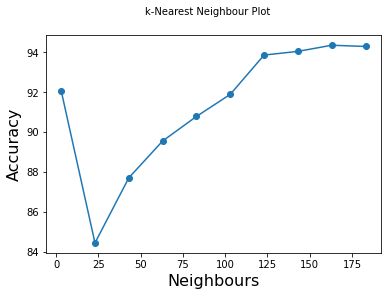

In [38]:
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print ("Features most indicative of a poisonous mushroom wrt kNN : ", headers[mode+1])

plt.figure(2)
plt.suptitle('k-Nearest Neighbour Plot', fontsize=10)
plt.plot(neighbours, acc, '-o')
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

In [39]:
y = np_utils.to_categorical(cate)
Y_train = y[:split]
Y_test = y[split:]

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)
print (data.shape)

(6499, 22) (1625, 22)
(6499,) (1625,)
(8124, 23)


In [40]:
model = Sequential()

model.add(Dense(11, input_shape=(22,)))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                253       
_________________________________________________________________
activation_4 (Activation)    (None, 11)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 60        
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 325
Trainable params: 325
Non-trainable params: 0
________________________________________________________

In [41]:
hist = model.fit(x_train, Y_train,
         nb_epoch=70,
         shuffle=True,
         batch_size=128,
         validation_data=(x_test, Y_test))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 6499 samples, validate on 1625 samples
Epoch 1/70
6499/6499 [==============================] - 0s 23us/step - loss: 0.7547 - accuracy: 0.6158 - val_loss: 0.4858 - val_accuracy: 0.9852
Epoch 2/70
6499/6499 [==============================] - 0s 11us/step - loss: 0.5658 - accuracy: 0.6818 - val_loss: 0.2412 - val_accuracy: 0.9698
Epoch 3/70
6499/6499 [==============================] - 0s 11us/step - loss: 0.4708 - accuracy: 0.7641 - val_loss: 0.1923 - val_accuracy: 0.9686
Epoch 4/70
6499/6499 [==============================] - 0s 12us/step - loss: 0.4154 - accuracy: 0.8224 - val_loss: 0.1708 - val_accuracy: 0.9723
Epoch 5/70
6499/6499 [==============================] - 0s 11us/step - loss: 0.3668 - accuracy: 0.8655 - val_loss: 0.1496 - val_accuracy: 0.9723
Epoch 6/70
6499/6499 [==============================] - 0s 12us/step - loss: 0.3093 - accuracy: 0.8981 - val_loss: 0.1463 - val_accuracy: 0.9674
Epoch 7/70
6499/6499 [==============================] - 0s 13us/step - loss: 0.256

KeyError: ignored

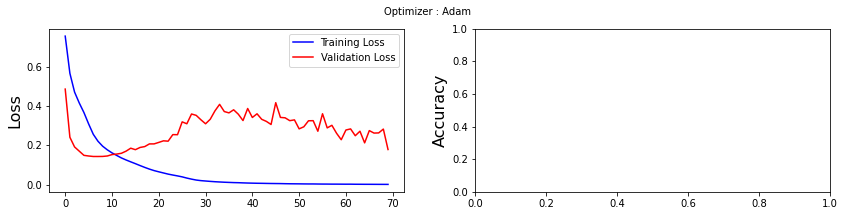

In [45]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()